In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")



In [3]:
df=pd.read_csv('C:\\Users\\KIIT\\Downloads\\walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.describe()

#     Data Analysis 

# top 10 weekly sales

In [222]:
data_grouped=df.groupby('Date').sum()['Weekly_Sales'].nlargest(10)

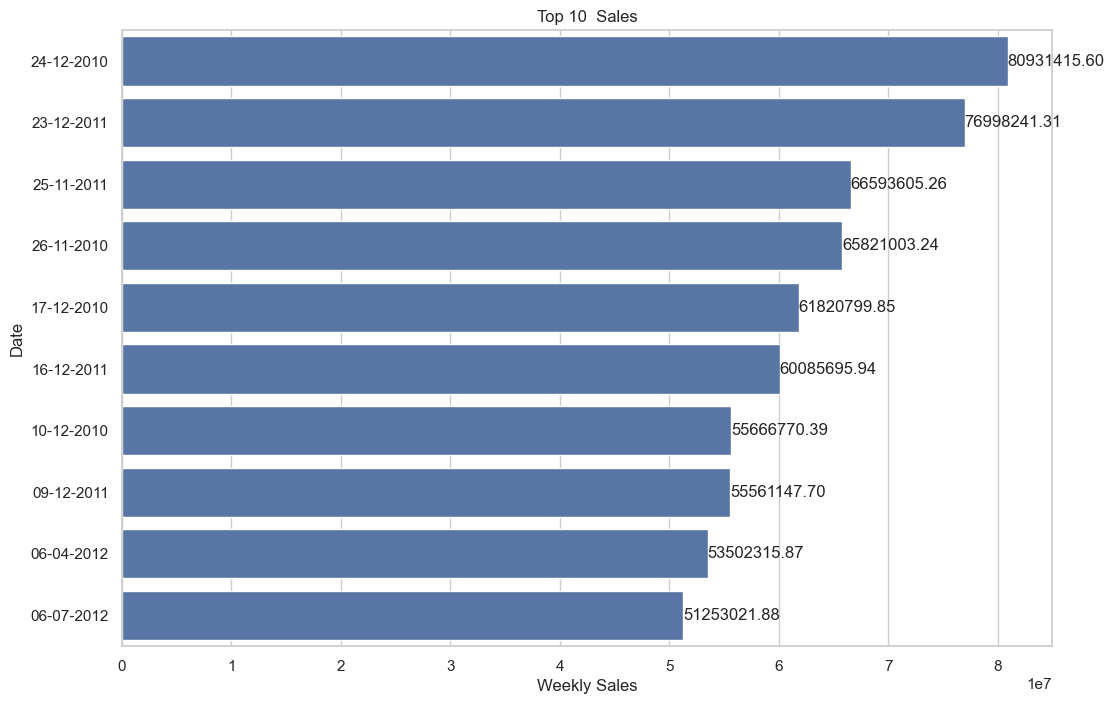

In [223]:
plt.figure(figsize=(12,8))

sns.set(style="whitegrid")

# Create a horizontal bar plot
ax = sns.barplot(y=data_grouped.index, x=data_grouped, orient='h')

# Annotate each bar with its value
for index, value in enumerate(data_grouped):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=12)

# Set labels and title
ax.set(xlabel='Weekly Sales', ylabel='Date', title='Top 10  Sales')

# Show the plot
plt.show()


# Monthly Sales Distribution

In [89]:
month=pd.to_datetime(df['Date'],format='%d-%m-%Y').dt.strftime('%B')
grouped_month=df.groupby(month).sum()['Weekly_Sales']




Text(0.5, 1.0, 'Monthly sales distribution')

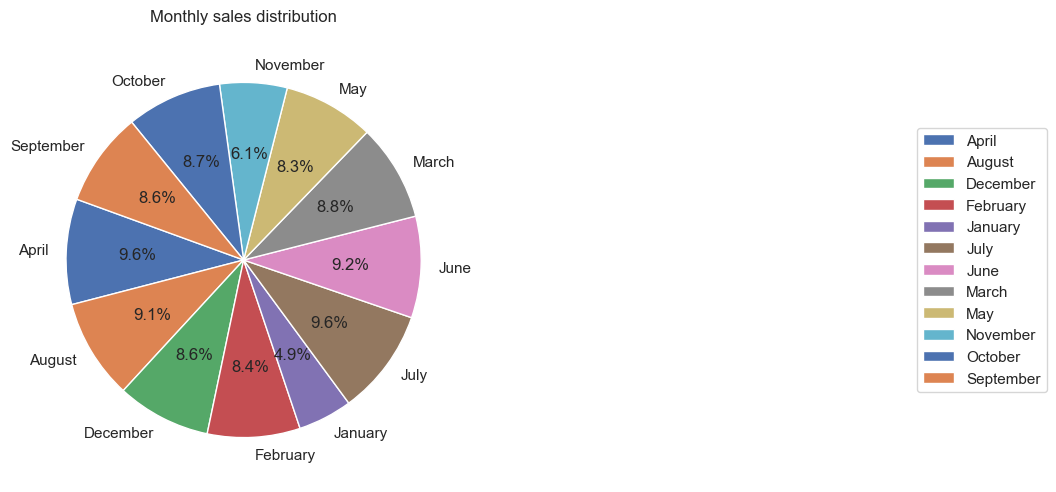

In [90]:
ax=grouped_month.plot.pie(autopct="%.1f%%",startangle=160)
plt.tight_layout()
ax.legend(bbox_to_anchor=(2, 0.5), loc="center left")
plt.ylabel("")
plt.title("Monthly sales distribution",pad=12)

# Sales year-wise distriubtion

In [82]:
year=pd.to_datetime(df['Date'],format='%d-%m-%Y').dt.year
grouped_year=df.groupby(year).sum()['Weekly_Sales']
grouped_year



Date
2010    2.288886e+09
2011    2.448200e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64

Text(0.5, 1.0, 'Yearly Sales')

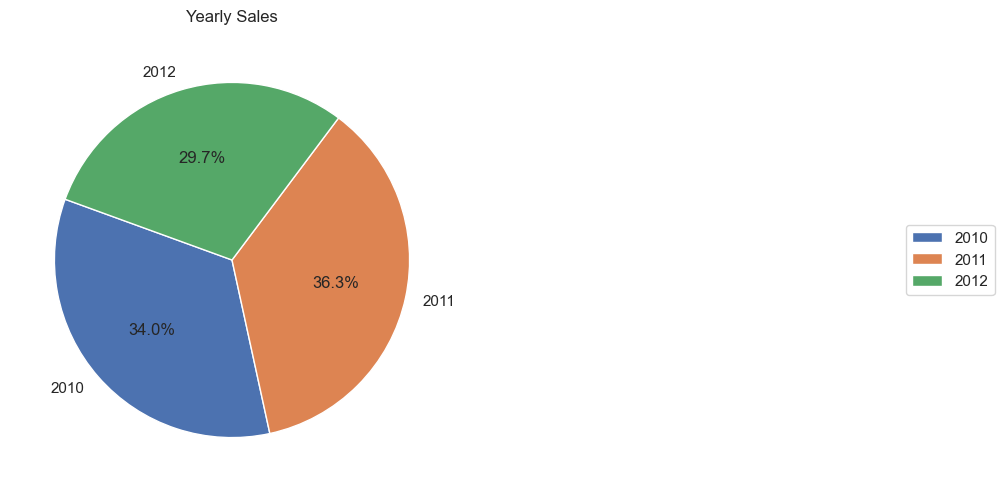

In [83]:
ax=grouped_year.plot.pie(autopct="%.1f%%",startangle=160)
plt.tight_layout()
ax.legend(bbox_to_anchor=(2, 0.5), loc="center left")
plt.ylabel("")
plt.title("Yearly Sales",pad=12)


#  finding sales in each store

In [96]:
store_sales=df.groupby('Store').sum()['Weekly_Sales'].nlargest(10)
store_sales


Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
Name: Weekly_Sales, dtype: float64

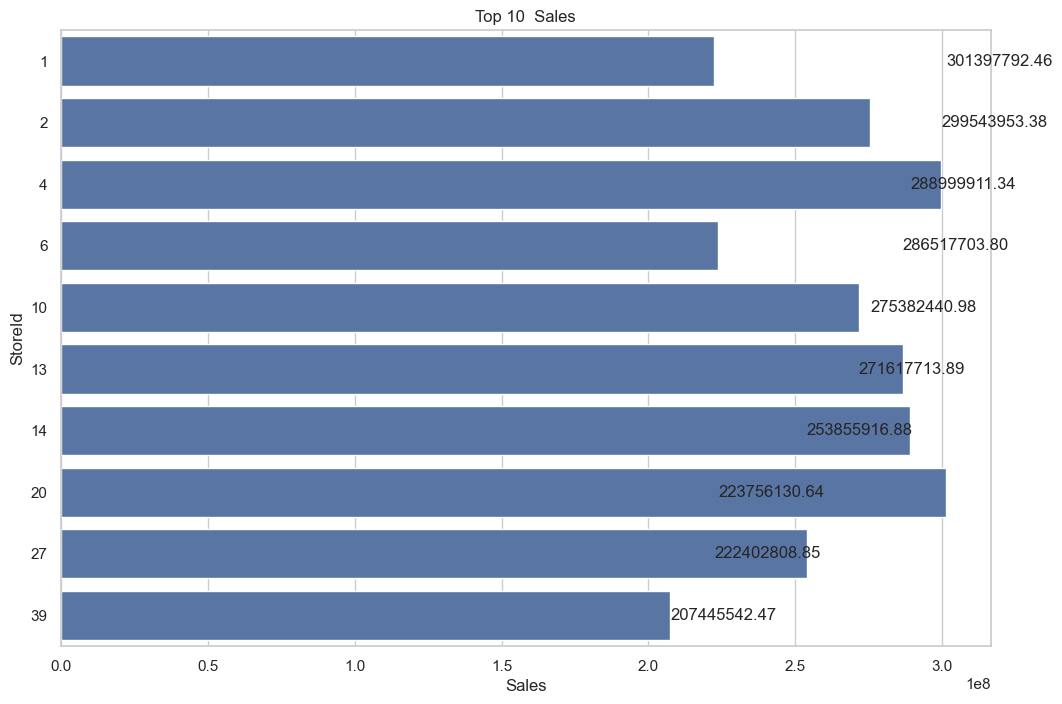

In [98]:
plt.figure(figsize=(12,8))

sns.set(style="whitegrid")

# Create a horizontal bar plot
ax = sns.barplot(y=store_sales.index, x=store_sales, orient='h')

# Annotate each bar with its value
for index, value in enumerate(store_sales):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=12)

# Set labels and title
ax.set(xlabel='Sales', ylabel='StoreId', title='Top 10  Sales')

# Show the plot
plt.show()

# analyzing temperature effects

In [48]:
temp=df.groupby('Temperature').sum()['Weekly_Sales']
#grouped_temperature=temp[temp>100000]
grouped_temperature





# holiday sales

In [84]:
sales_holiday=df.groupby('Holiday_Flag').sum()['Weekly_Sales']
sales_holiday


Holiday_Flag
0    6.231919e+09
1    5.052996e+08
Name: Weekly_Sales, dtype: float64

<Axes: ylabel='Weekly_Sales'>

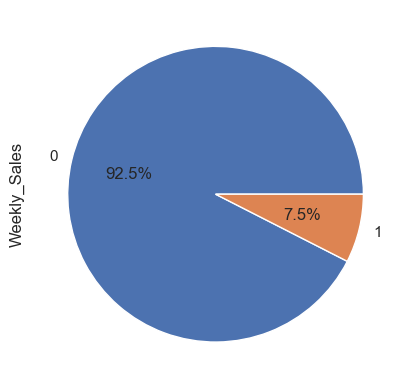

In [85]:
sales_holiday.plot.pie(autopct="%.1f%%")

#  Variation in Sales due to temperature

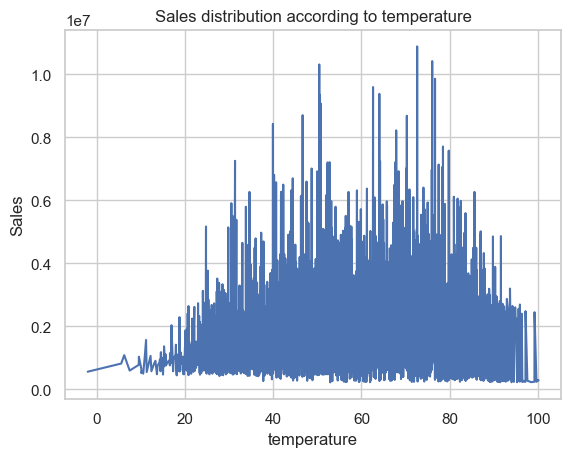

In [49]:
sns.set(style="whitegrid")

# Create a line chart
sns.lineplot(x=grouped_temperature.index, y=grouped_temperature)

# Set labels and title
plt.xlabel('temperature')
plt.ylabel('Sales')
plt.title('Sales distribution according to temperature')

# Show the plot
plt.show()


# fiding sales according to fuel_price


In [54]:
fuel=df.groupby('Fuel_Price').sum()['Weekly_Sales']



Fuel_Price
2.472      470281.03
2.513      434471.38
2.514    14211389.79
2.520      447519.44
2.533      431294.45
            ...     
4.294     5255081.92
4.301     5118684.85
4.308     2662689.06
4.449     5064130.51
4.468     5195825.00
Name: Weekly_Sales, Length: 892, dtype: float64

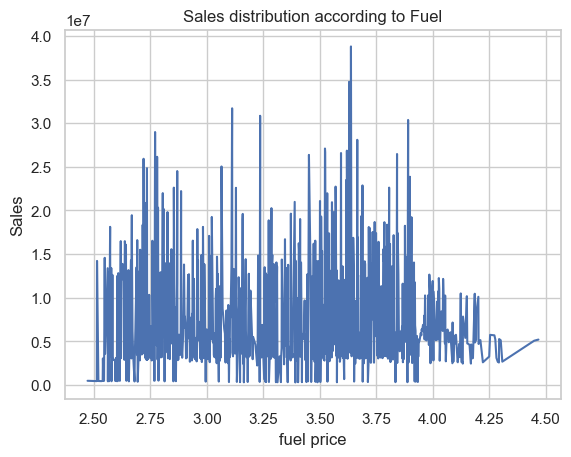

In [55]:
sns.set(style="whitegrid")

# Create a line chart
sns.lineplot(x=fuel.index, y=fuel)

# Set labels and title
plt.xlabel('fuel price')
plt.ylabel('Sales')
plt.title('Sales distribution according to Fuel')

# Show the plot
plt.show()


#  Variation in sales due to Unemployment



In [57]:
sales_unemp=df.groupby('Unemployment').sum()['Weekly_Sales']
sales_unemp


Unemployment
3.879      8589722.81
4.077     27796792.46
4.125     31216620.35
4.145      9479222.48
4.156     31514684.52
             ...     
13.975    22848779.54
14.021    32244964.33
14.099    34456713.36
14.180    33122529.04
14.313    39308921.37
Name: Weekly_Sales, Length: 349, dtype: float64

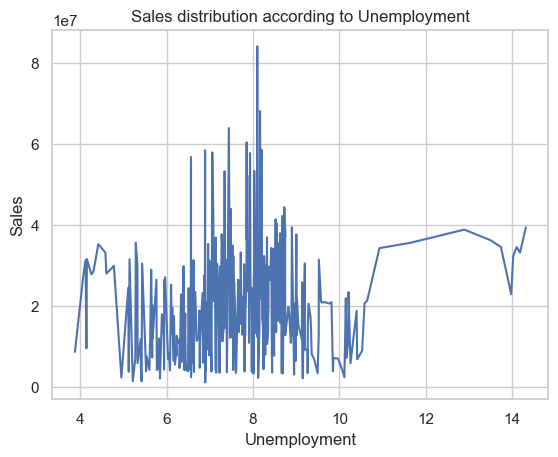

In [59]:
sns.set(style="whitegrid")

# Create a line chart
sns.lineplot(x=sales_unemp.index, y=sales_unemp)

# Set labels and title
plt.xlabel('Unemployment')
plt.ylabel('Sales')
plt.title('Sales distribution according to Unemployment')

# Show the plot
plt.show()


# Finding unemployment in years

In [68]:

date_unemp=df.groupby('Date').sum()['Unemployment'].nlargest(10)
date_unemp


Date
05-02-2010    387.869
05-03-2010    387.869
12-02-2010    387.869
12-03-2010    387.869
19-02-2010    387.869
19-03-2010    387.869
26-02-2010    387.869
26-03-2010    387.869
02-04-2010    382.397
04-06-2010    382.397
Name: Unemployment, dtype: float64

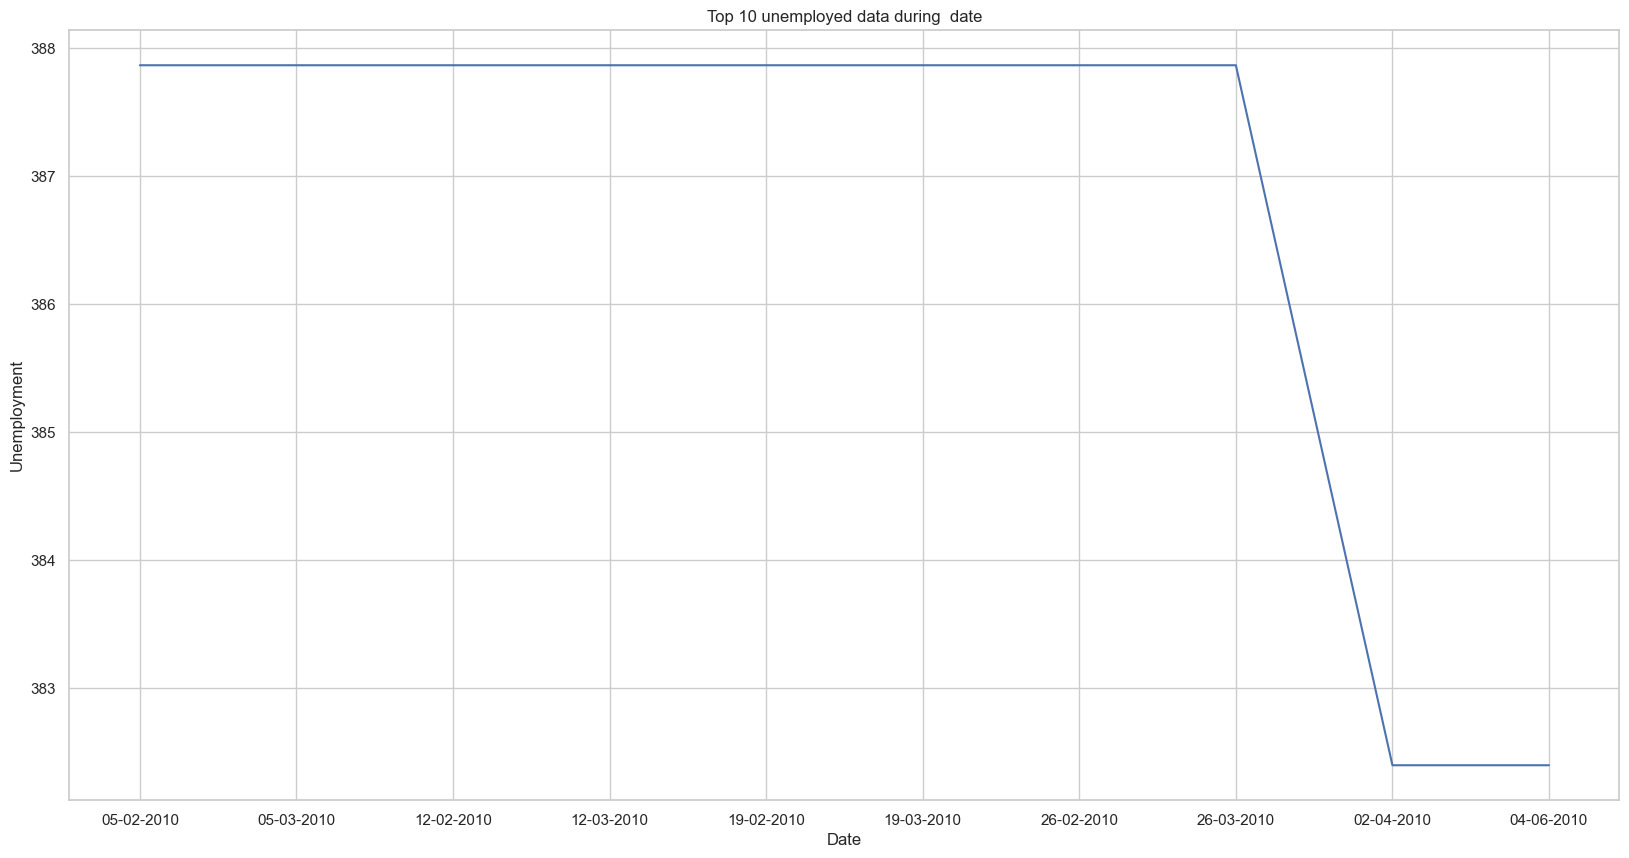

In [73]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))
# Create a line chart
sns.lineplot(x=date_unemp.index, y=date_unemp)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Unemployment')
plt.title('Top 10 unemployed data')

# Show the plot
plt.show()


#  Unemployment in Years

In [76]:
year_unemp=df.groupby(year).sum()['Unemployment']
year_unemp

Date
2010    18344.263
2011    18911.964
2012    14218.310
Name: Unemployment, dtype: float64

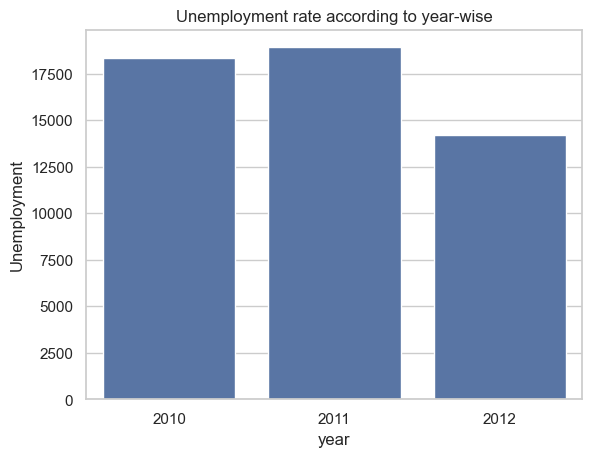

In [77]:
sns.set(style="whitegrid")

# Create a line chart
sns.barplot(x=year_unemp.index, y=year_unemp)

# Set labels and title
plt.ylabel('Unemployment')
plt.xlabel('year')
plt.title('Unemployment score according to year-wise')

# Show the plot
plt.show()



# Checking  for outliers

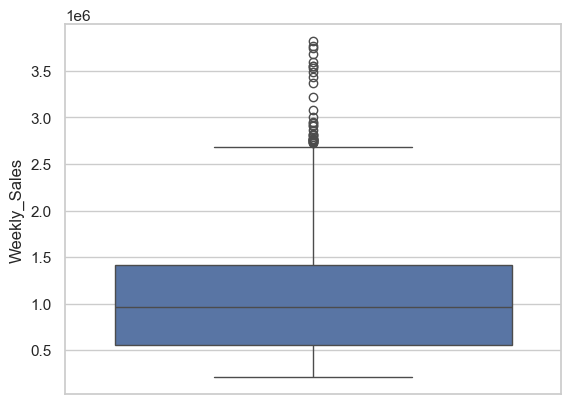

In [102]:
sns.boxplot(df.Weekly_Sales)
plt.show()

<Axes: xlabel='Temperature'>

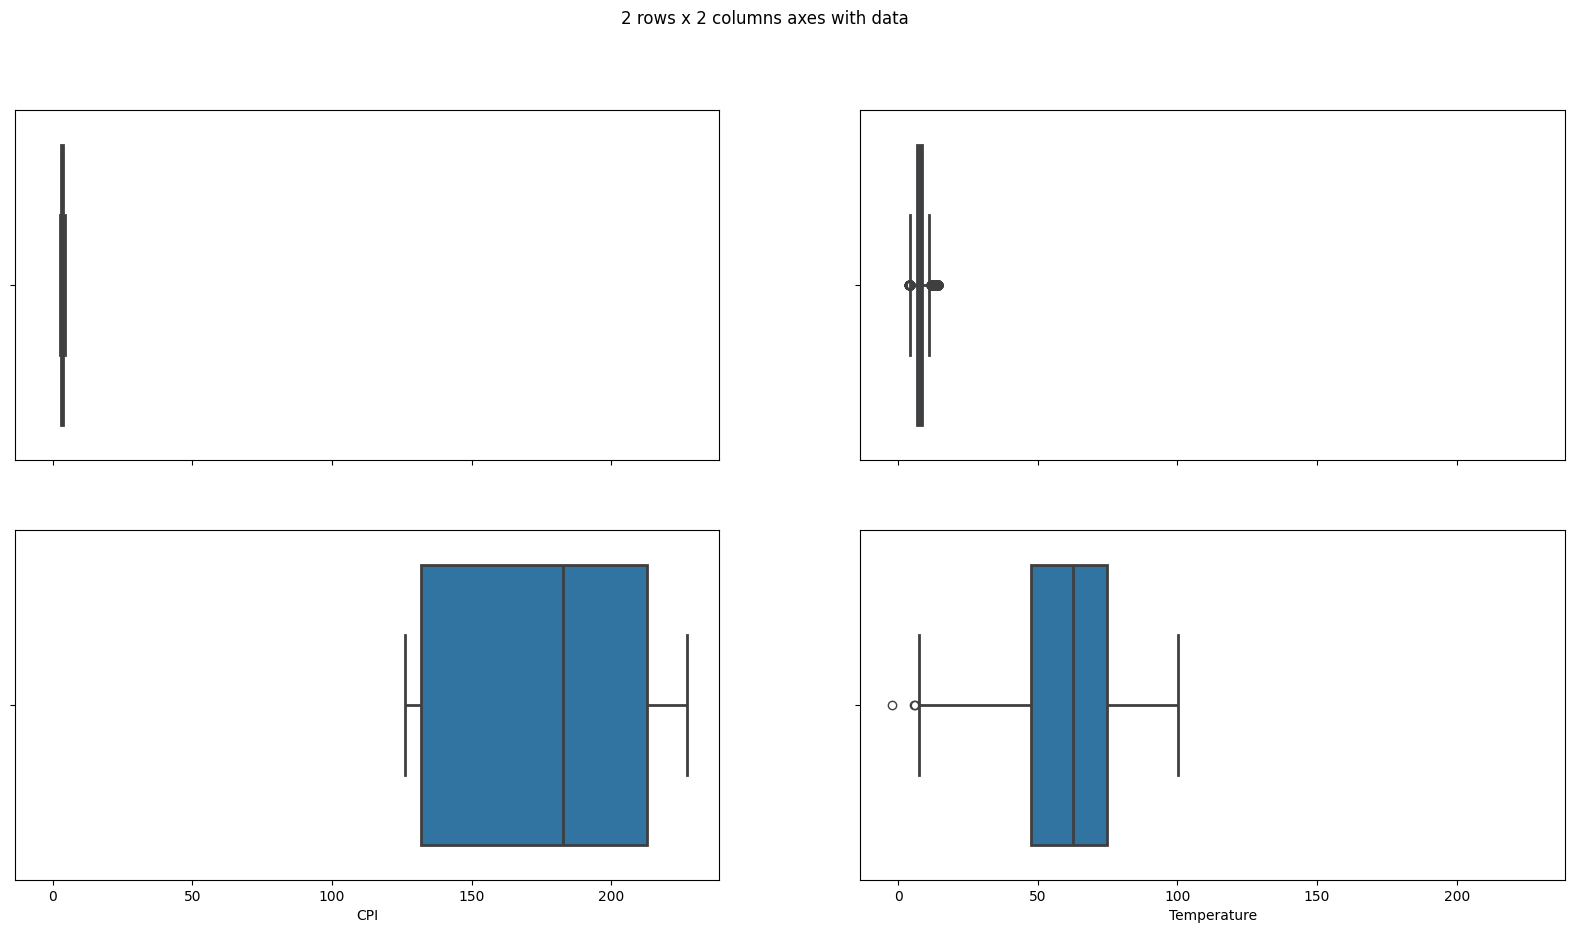

In [133]:
fig, axes = plt.subplots(2,2 , sharex=True, figsize=(20,10))
fig.suptitle('2 rows x 2 columns axes with data')

# now 
sns.boxplot(data=df,ax=axes[0,0],x='Fuel_Price',linewidth=2)
sns.boxplot(data=df,ax=axes[0,1],x='Unemployment',linewidth=2)
sns.boxplot(data=df,ax=axes[1,0],x='CPI',linewidth=2)
sns.boxplot(data=df,ax=axes[1,1],x='Temperature',linewidth=2)




In [129]:
df


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# Outliers Treatment in three  features i.e weekly sales, temperature and Unemployment

In [149]:
#outliers removed
modified_df=df
arr=['Weekly_Sales','Temperature','Unemployment']
for  item in arr:
    upper_limit = modified_df[item].mean() + 3 * modified_df[item].std()
    lower_limit = modified_df[item].mean() -3 * modified_df[item].std()
    modified_df=modified_df[(modified_df[item] < upper_limit) & (modified_df[item] > lower_limit)]

    


In [150]:
modified_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# Checking null values

In [152]:
modified_df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# Removing Column having  constant value   

In [153]:
modified_df.drop(axis=1,columns=['Holiday_Flag'],inplace=True)


In [158]:
modified_df.dtypes


Store             int64
Date              int32
Weekly_Sales    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

# Conversion  of object into integer format

In [ ]:
modified_df['Date']=modified_df['Date'].str.replace("-",'').astype('int')

In [156]:
improved_df.dtypes


Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

# Finding  Correlation

<Axes: >

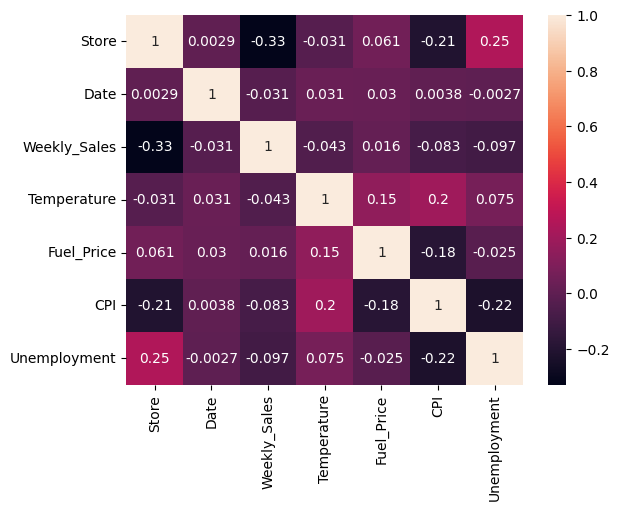

In [160]:

sns.heatmap(modified_df.corr(),annot=True)

# Standardizing the dataset

In [171]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
modified_df=object.fit_transform(modified_df)
 

StandardScaler()

In [172]:
modified_df.shape

(6185, 7)

In [173]:
modified_df

array([[-1.68165881, -1.22083573,  1.09423677, ..., -1.70974388,
         0.96833421,  0.21024325],
       [-1.68165881, -0.42202907,  1.09108311, ..., -1.76172493,
         0.97206043,  0.21024325],
       [-1.68165881,  0.37677759,  1.03652402, ..., -1.83536476,
         0.97326083,  0.21024325],
       ...,
       [ 1.68973608, -0.41289962, -0.55990719, ...,  1.38312888,
         0.48868905,  0.57974428],
       [ 1.68973608,  0.38590703, -0.58963221, ...,  1.31598669,
         0.48878076,  0.57974428],
       [ 1.68973608,  1.18471369, -0.51293854, ...,  1.12755536,
         0.48821969,  0.57974428]])

# Splitting data of the data for model

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import r2_score,mean_squared_error


In [174]:
y= modified_df[:, 2]
X=np.delete(modified_df,2,axis=1)

In [175]:
print(X.shape,y.shape,improved_df.shape)


(6185, 6) (6185,) (6185, 7)


In [176]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)



In [177]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4329, 6), (4329,), (1856, 6), (1856,))

# using LinearRegression

In [178]:
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [179]:
y_pred=model.predict(X_test)
test_score=r2_score(y_test,y_pred)
print(test_score)


0.15173876190831748


In [180]:
print(mean_squared_error(y_test,y_pred))

0.8528221315629811


# Using lasso regression

In [195]:

ls=Lasso(alpha=0.01)
ls.fit(X_train,y_train)
y_pred=ls.predict(X_test)
print(r2_score(y_test,y_pred))
print('mean squared error',mean_squared_error(y_test,y_pred))

0.14944411830479887
mean squared error 0.8551291129046402


# Observing  the   feature's weight 

In [193]:
importance=ls.coef_
importance2=importance.flatten()
importance2

array([-0.33665411, -0.02165012, -0.00208261,  0.00729184, -0.15142902,
       -0.05426495])

In [194]:
for i,v in enumerate(importance2):
 print('Feature: %0d, Score: %.5f'%(i,v))


Feature: 0, Score: -0.33665
Feature: 1, Score: -0.02165
Feature: 2, Score: -0.00208
Feature: 3, Score: 0.00729
Feature: 4, Score: -0.15143
Feature: 5, Score: -0.05426


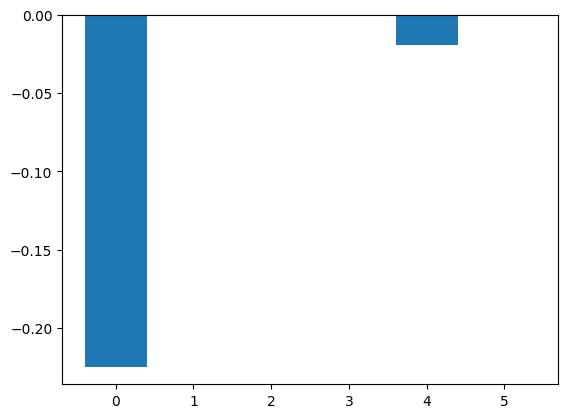

In [184]:
plt.bar([x for x in range(len(importance2))], importance2)
plt.show()

# Decision Tree Regressor

In [202]:
from sklearn.tree import DecisionTreeRegressor


In [208]:
Dt=DecisionTreeRegressor()
Dt.fit(X_train,y_train)
y_pred=Dt.predict(X_test)
print(f' r2 score is {r2_score(y_test,y_pred)} and mean square error is {mean_squared_error(y_test,y_pred)}')


 r2 score is 0.8909922570337239 and mean square error is 0.10959385097273688


# KNeighborsRegressor

In [211]:
from sklearn.neighbors import KNeighborsRegressor
Kn=KNeighborsRegressor(n_neighbors=2)
Kn.fit(X_train,y_train)
y_pred=Kn.predict(X_test)
print(f'score is {r2_score(y_test,y_pred)} and error is  {mean_squared_error(y_test,y_pred)}')



score is 0.30856359846433323 and error is  0.6951540861686187


# Using ensemble techniques

In [214]:
from sklearn.ensemble import GradientBoostingRegressor
Gb=GradientBoostingRegressor(random_state=42)
Gb.fit(X_train,y_train)
y_pred=Gb.predict(X_test)
print(f'score is {r2_score(y_test,y_pred)} and  error is {mean_squared_error(y_test,y_pred)}')



score is 0.8884040190417775 and  error is 0.11219600528813359


In [215]:
from sklearn.ensemble import RandomForestRegressor
Rf=RandomForestRegressor()
Rf.fit(X_train,y_train)
y_pred=Rf.predict(X_test)
print(f'score is {r2_score(y_test,y_pred)} and  error is {mean_squared_error(y_test,y_pred)}')


score is 0.9443751847010776 and  error is 0.055923896343235746


# Using Boosting Algorithm

In [226]:


import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
print(f'score is {r2_score(y_test,y_pred)} and error is {mean_squared_error(y_test,y_pred)}')


score is 0.969351575432411 and error is 0.030813213659956745


# Cross validation

In [196]:
#using k fold cross validation  
from sklearn.model_selection import cross_val_score,KFold
from sklearn.ensemble import RandomForestRegressor




# Cross validation for  RandomForest Regressor

In [200]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
score=cross_val_score(Rf,X,y,cv=kf)
print(f'score is {score}')

score is [0.94992013 0.94658532 0.95070858 0.9445828  0.95159669]


In [201]:
print(f'mean score is {score.mean()}')

mean score is 0.9486787036833535


# Cross Validation for   xgboost

In [225]:

xg_boost=cross_val_score(xgb_model,X,y,cv=kf)
print(f'score is {r2_score(y_test,y_pred)} and error is {mean_squared_error(y_test,y_pred)}')



score is 0.969351575432411 and error is 0.030813213659956745


In overall, xgboost gives best result  and linear and Lasso  regression give low score.
RandomForest regressor also gives better result